In [1]:
import tensorflow.keras as K
import tensorflow as tf


def preprocess_data(X, Y):
    """
    a function that trains a convolutional neural network to classify the
    CIFAR 10 dataset
    :param X: X is a numpy.ndarray of shape (m, 32, 32, 3) containing the
    CIFAR 10 data, where m is the number of data points
    :param Y: Y is a numpy.ndarray of shape (m,) containing the CIFAR 10
    labels for X
    :return: X_p, Y_p
        X_p is a numpy.ndarray containing the preprocessed X
        Y_p is a numpy.ndarray containing the preprocessed Y
    """
    X_p = K.applications.resnet50.preprocess_input(X)
    Y_p = K.utils.to_categorical(Y, 10)
    return X_p, Y_p



In [2]:
if __name__ == "__main__":
    (x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()
    print((x_train.shape, y_train.shape))
    x_train, y_train = preprocess_data(x_train, y_train)
    x_test, y_test = preprocess_data(x_test, y_test)
    print((x_train.shape, y_train.shape))

    input_t = K.Input(shape=(32, 32, 3))
    res_model = K.applications.ResNet50(include_top=False,
                                        weights="imagenet",
                                        input_tensor=input_t)
    
    
    for layer in res_model.layers[:143]:
        layer.trainable = False

    for i, layer in enumerate(res_model.layers):
        print(i, layer.name, "-", layer.trainable)

    to_res = (224, 224)
    model = K.models.Sequential()
   # model.add(K.layers.Lambda(lambda image: tf.image.resize(image, to_res))) 
    model.add(res_model)
    model.add(K.layers.Flatten())
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(256, activation='relu'))
    model.add(K.layers.Dropout(0.25))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(128, activation='relu'))
    model.add(K.layers.Dropout(0.25))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(64, activation='relu'))
    model.add(K.layers.Dropout(0.25))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(10, activation='softmax'))
    check_point = K.callbacks.ModelCheckpoint(filepath="cifar10.h5",
                                              monitor="val_acc",
                                              mode="max",
                                              save_best_only=True,
                                              )

    model.compile(loss='categorical_crossentropy',
                  optimizer=K.optimizers.Adam(lr=3e-4),
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1,
                        validation_data=(x_test, y_test),
                        callbacks=[check_point])
    model.summary()
    # model.save("cifar10.h5")

((50000, 32, 32, 3), (50000, 1))
((50000, 32, 32, 3), (50000, 10))
0 input_1 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_

c:\Users\vanch\anaconda3\envs\vanenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
1563/1563 [==============================] - 112s 56ms/step - loss: 1.4452 - accuracy: 0.5195 - val_loss: 0.9860 - val_accuracy: 0.6685
Epoch 2/50
1563/1563 [==============================] - 79s 51ms/step - loss: 1.0674 - accuracy: 0.6483 - val_loss: 0.8845 - val_accuracy: 0.7003
Epoch 3/50
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9594 - accuracy: 0.6846 - val_loss: 0.8458 - val_accuracy: 0.7085
Epoch 4/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8691 - accuracy: 0.7125 - val_loss: 0.8514 - val_accuracy: 0.7100
Epoch 5/50
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8054 - accuracy: 0.7359 - val_loss: 0.8111 - val_accuracy: 0.7255
Epoch 6/50
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7353 - accuracy: 0.7582 - val_loss: 0.8193 - val_accuracy: 0.7214
Epoch 7/50
1563/1563 [==============================] - 54s 34ms/step - loss: 0.6711 - accuracy: 0.7798 - val_loss: 0.8181 

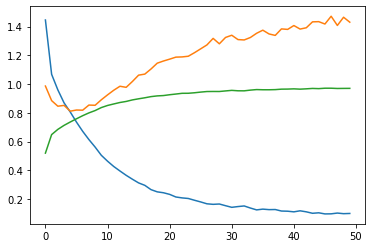

In [6]:
losses = model.history.history['loss']
acc = model.history.history['accuracy']
val_losses = model.history.history['val_loss']
import matplotlib.pyplot as plt
plt.plot(losses)
plt.plot(val_losses)
plt.plot(acc)

In [ ]:
(x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()

In [4]:
if __name__ == "__main__":
    
    print((x_train.shape, y_train.shape))
    x_train, y_train = preprocess_data(x_train, y_train)
    x_test, y_test = preprocess_data(x_test, y_test)
    print((x_train.shape, y_train.shape))

    input_t = K.Input(shape=(32, 32, 3))
    res_model = K.applications.ResNet50(include_top=False,
                                        weights="imagenet",
                                        input_tensor=input_t)
    
    
    for layer in res_model.layers[:143]:
        layer.trainable = False

    for i, layer in enumerate(res_model.layers):
        print(i, layer.name, "-", layer.trainable)

    to_res = (224, 224)
    model = K.models.Sequential()
   # model.add(K.layers.Lambda(lambda image: tf.image.resize(image, to_res))) 
    model.add(res_model)
    model.add(K.layers.Flatten())
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(256, activation='relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(128, activation='relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(64, activation='relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(10, activation='softmax'))
    check_point = K.callbacks.ModelCheckpoint(filepath="cifar10.h5",
                                              monitor="val_acc",
                                              mode="max",
                                              save_best_only=True,
                                              )

    model.compile(loss='categorical_crossentropy',
                  optimizer=K.optimizers.Adam(lr=1e-4),
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=32, epochs=15, verbose=1,
                        validation_data=(x_test, y_test),
                        callbacks=[check_point])
    model.summary()
    # model.save("cifar10.h5")

((50000, 32, 32, 3), (50000, 10))
((50000, 32, 32, 3), (50000, 10, 10))
0 input_3 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_bloc

ValueError: in user code:

    C:\Users\vanch\anaconda3\envs\vanenv\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\vanch\anaconda3\envs\vanenv\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\vanch\anaconda3\envs\vanenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\vanch\anaconda3\envs\vanenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\vanch\anaconda3\envs\vanenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\vanch\anaconda3\envs\vanenv\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\vanch\anaconda3\envs\vanenv\lib\site-packages\tensorflow\python\keras\engine\training.py:797 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\vanch\anaconda3\envs\vanenv\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\vanch\anaconda3\envs\vanenv\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\vanch\anaconda3\envs\vanenv\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\vanch\anaconda3\envs\vanenv\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\vanch\anaconda3\envs\vanenv\lib\site-packages\tensorflow\python\keras\losses.py:1644 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits)
    C:\Users\vanch\anaconda3\envs\vanenv\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\vanch\anaconda3\envs\vanenv\lib\site-packages\tensorflow\python\keras\backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\vanch\anaconda3\envs\vanenv\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 10, 10) and (None, 10) are incompatible


In [ ]:
K.learning_phase = K.backend.learning_phase

_, (X, Y) = K.datasets.cifar10.load_data()
X_p, Y_p = preprocess_data(X, Y)
model = K.models.load_model('cifar10.h5')
model.evaluate(X_p, Y_p, batch_size=128, verbose=1)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'bo', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()